In [10]:
import pandas as pd
import numpy as np

from kmeans import *
from hclustering import *
from dbscan import *

## Data Wrangling

In [11]:
bene_2008 = pd.read_csv("data/beneficiary/DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv")
bene_2008["Year"] = pd.to_datetime("12-31-2008")
bene_2008["BENE_BIRTH_DT"] = pd.to_datetime(bene_2008["BENE_BIRTH_DT"].astype(str))
bene_2008 = bene_2008.set_index("DESYNPUF_ID")
bene_2008

,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,Year
DESYNPUF_ID,,,,,,,,,,,,,,,,,,,,,
00013D2EFD8E45D1,1923-05-01,NaN,1,1,0,26,950,12,12,12,...,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,2008-12-31
00016F745862898F,1943-01-01,NaN,1,1,0,39,230,12,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,2008-12-31
0001FDD721E223DC,1936-09-01,NaN,2,1,0,39,280,12,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-12-31
00021CA6FF03E670,1941-06-01,NaN,1,5,0,6,290,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-12-31
00024B3D2352D2D0,1936-08-01,NaN,1,1,0,52,590,12,12,0,...,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,2008-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FFFD7C464C94D136,1943-07-01,NaN,2,1,0,54,0,12,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-12-31
FFFE3ED9582AD46E,1916-06-01,NaN,2,1,0,6,150,12,12,0,...,0.0,0.0,0.0,1570.0,780.0,0.0,1370.0,350.0,0.0,2008-12-31
FFFE7AB5D7F1725D,1939-04-01,NaN,2,1,0,23,490,12,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-12-31


In [12]:
bene_2009 = pd.read_csv("data/beneficiary/DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv")
bene_2009["Year"] = pd.to_datetime("12-31-2009")
bene_2009["BENE_BIRTH_DT"] = pd.to_datetime(bene_2009["BENE_BIRTH_DT"].astype(str))
bene_2009 = bene_2009.set_index("DESYNPUF_ID")
bene_2009

,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,Year
DESYNPUF_ID,,,,,,,,,,,,,,,,,,,,,
00013D2EFD8E45D1,1923-05-01,NaN,1,1,0,26,950,12,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,20.0,0.0,2009-12-31
00016F745862898F,1943-01-01,NaN,1,1,0,39,230,12,12,0,...,36000.0,3204.0,0.0,60.0,70.0,0.0,1350.0,530.0,100.0,2009-12-31
0001FDD721E223DC,1936-09-01,NaN,2,1,0,39,280,12,12,0,...,0.0,0.0,0.0,30.0,50.0,0.0,20.0,0.0,0.0,2009-12-31
00021CA6FF03E670,1941-06-01,NaN,1,5,0,6,290,12,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,90.0,10.0,0.0,2009-12-31
00024B3D2352D2D0,1936-08-01,NaN,1,1,0,52,590,12,12,2,...,0.0,0.0,0.0,90.0,40.0,0.0,410.0,140.0,0.0,2009-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FFFD7C464C94D136,1943-07-01,NaN,2,1,0,54,0,12,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,200.0,40.0,0.0,2009-12-31
FFFE3ED9582AD46E,1916-06-01,NaN,2,1,0,6,150,12,12,0,...,2000.0,1068.0,0.0,3240.0,1390.0,0.0,2510.0,620.0,0.0,2009-12-31
FFFE7AB5D7F1725D,1939-04-01,NaN,2,1,0,23,490,12,12,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009-12-31


In [13]:
bene_2010 = pd.read_csv("data/beneficiary/DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv")
bene_2010["Year"] = pd.to_datetime("12-31-2010")
bene_2010["BENE_BIRTH_DT"] = pd.to_datetime(bene_2010["BENE_BIRTH_DT"].astype(str))
bene_2010 = bene_2010.set_index("DESYNPUF_ID")
bene_2010

,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,Year
DESYNPUF_ID,,,,,,,,,,,,,,,,,,,,,
00013D2EFD8E45D1,1923-05-01,NaN,1,1,0,26,950,12,12,12,...,4000.0,1100.0,0.0,0.0,0.0,0.0,90.0,30.0,0.0,2010-12-31
00016F745862898F,1943-01-01,NaN,1,1,Y,39,230,12,12,0,...,16000.0,1100.0,0.0,0.0,0.0,0.0,930.0,150.0,0.0,2010-12-31
0001FDD721E223DC,1936-09-01,NaN,2,1,0,39,280,12,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-12-31
00021CA6FF03E670,1941-06-01,NaN,1,5,0,6,290,12,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-12-31
00024B3D2352D2D0,1936-08-01,NaN,1,1,0,52,590,9,12,12,...,0.0,0.0,0.0,40.0,0.0,0.0,590.0,60.0,0.0,2010-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FFFD7C464C94D136,1943-07-01,NaN,2,1,0,54,0,12,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,10.0,0.0,2010-12-31
FFFE3ED9582AD46E,1916-06-01,20101101.0,2,1,0,6,150,12,12,0,...,0.0,0.0,0.0,360.0,280.0,0.0,1040.0,330.0,0.0,2010-12-31
FFFE7AB5D7F1725D,1939-04-01,NaN,2,1,0,23,490,12,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-12-31


In [14]:
ip_claims = pd.read_csv("data/inpatient/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv")
ip_claims["Claim Count"] = 1
ip_claims = ip_claims[["DESYNPUF_ID", "Claim Count", "CLM_PMT_AMT"]].groupby("DESYNPUF_ID").sum()
ip_claims

,Claim Count,CLM_PMT_AMT
DESYNPUF_ID,,
00013D2EFD8E45D1,1,4000.0
00016F745862898F,4,52000.0
00052705243EA128,1,14000.0
0007F12A492FD25D,4,53000.0
000B97BA2314E971,1,2000.0
...,...,...
FFF5F9218AB04A41,2,9000.0
FFF8B49458F9FFA7,2,13000.0
FFFA950301FCA748,1,7000.0


In [15]:
benes = pd.concat([bene_2010, bene_2009, bene_2008])
benes = benes[~benes.index.duplicated(keep='first')]
benes = benes.merge(how = "right", right=ip_claims, left_index=True, right_index=True)
benes["Est Age in Days"] = (benes["Year"] - benes["BENE_BIRTH_DT"]).apply(lambda x: x.days)
benes["BENE_RACE_CD"] = benes["BENE_RACE_CD"].astype(str)
benes = benes[["Est Age in Days", "CLM_PMT_AMT", "Claim Count", "BENE_RACE_CD", "BENE_SEX_IDENT_CD",
               "SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN",
               "SP_CNCR", "SP_COPD", "SP_DEPRESSN",
               "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS",
               "SP_RA_OA", "SP_STRKETIA"]]
benes = pd.get_dummies(benes)
benes.loc[:, ["BENE_RACE_CD_1", "BENE_RACE_CD_2", "BENE_RACE_CD_3", "BENE_RACE_CD_5"]] = benes.loc[:, ["BENE_RACE_CD_1", "BENE_RACE_CD_2", "BENE_RACE_CD_3", "BENE_RACE_CD_5"]].astype(int)
benes.loc[:, ["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN", "SP_CNCR", "SP_COPD", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS", "SP_RA_OA", "SP_STRKETIA"]] = benes.loc[:, ["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN", "SP_CNCR", "SP_COPD", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS", "SP_RA_OA", "SP_STRKETIA"]].mod(2)
benes["BENE_SEX_IDENT_CD"] = benes["BENE_SEX_IDENT_CD"].mod(2)
benes

,Est Age in Days,CLM_PMT_AMT,Claim Count,BENE_SEX_IDENT_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,BENE_RACE_CD_1,BENE_RACE_CD_2,BENE_RACE_CD_3,BENE_RACE_CD_5
DESYNPUF_ID,,,,,,,,,,,,,,,,,,,
00013D2EFD8E45D1,32021,4000.0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
00016F745862898F,24836,52000.0,4,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
00052705243EA128,28003,14000.0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0
0007F12A492FD25D,33359,53000.0,4,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0
000B97BA2314E971,26572,2000.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FFF5F9218AB04A41,20910,9000.0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
FFF8B49458F9FFA7,33237,13000.0,2,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0
FFFA950301FCA748,18811,7000.0,1,1,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0


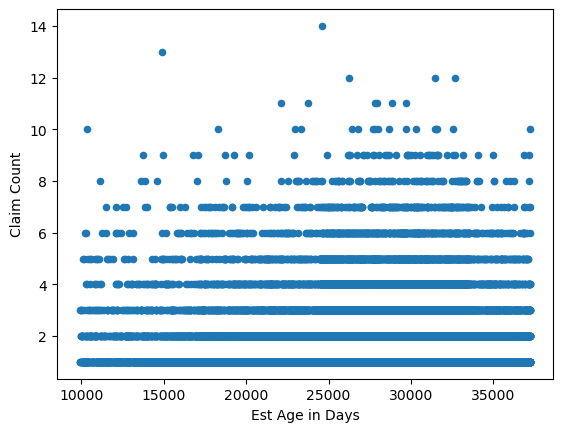

In [16]:
benes[["Est Age in Days", "Claim Count"]].plot.scatter(x = "Est Age in Days", y = "Claim Count")
plt.show()

In [19]:
bene_samp = benes.sample(frac=0.1)

## KMeans Clustering

In [11]:
kmeans_report(kmeans(benes, 6))

Number of Clusters: 6
Standardized Data: True

Intercluster Distances (Standardized):
          0         1         2         3         4         5
0  0.000000  4.916225  5.678083  5.152793  8.674695  4.383098
1  4.916225  0.000000  4.181231  4.281434  7.852590  2.406770
2  5.678083  4.181231  0.000000  5.199489  7.761836  4.208237
3  5.152793  4.281434  5.199489  0.000000  8.376955  3.512276
4  8.674695  7.852590  7.761836  8.376955  0.000000  7.810640
5  4.383098  2.406770  4.208237  3.512276  7.810640  0.000000

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Cluster: 0
Cluster Size: 2044
Center (Standardized): 0.07655935028378288, 0.12858049209927652, 0.219277369073618, -0.0028409374525079504, 0.3634747084332665, 0.3656687629363804, 0.4006520892404858, 0.10147268013868022, 0.2528603446853687, 0.20477358256102496, 0.3699099666944583, 0.3255207653393684, 0.17452007975462

## Hierarchal Clustering

In [ ]:
hclust_report(hclust(bene_samp, 6, by = "nclust"))